# EE5610-PRML : Program Assignment 2 


# EE20MTECH12001 : Shantanu Yadav



1. Blog Feedback prediction

This data originates from blog posts. The raw HTML-documents of the blog
posts were crawled and processed. The regression task associated with the
data is the prediction of the number of comments in the upcoming 24 hours. In
order to simulate this situation, we choose a base-time (in the past) and select
the blog posts that were published at most 72 hours before the selected base
date/time. Then, we calculate all the features of the selected blog posts from
the information that was available at the basetime, therefore each instance
corresponds to a blog post. The target is the number of comments that the
blog post received in the next 24 hours relative to the basetime.

Link to Dataset
http://archive.ics.uci.edu/ml/datasets/BlogFeedback

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

def least_squares(X,y,regularized=False,lamda=0.01):
    #this code given solution of the least square problem 
    #Relation between inputs and least square solution is y=W.T@X where
    #X=[ones(N);x] and size(X) is (D+1)xN
    #Inputs:
    #y of size DxN
    #so W=pinv(X).T@y.T to give size of (D+1)X D
    if regularized:
        m,n=(X.T@X).shape
        W=(np.linalg.inv(X.T@X + lamda*np.eye(m,n))@X.T).T@y.T    
    else:     W=np.linalg.pinv(X).T@y.T
    return W

def stack_onearray(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))

def poly_kernel(x,M):
    #This function takes two inputs : x vector and size of kernel (M).
    #The polynomial kernel is [1;x;x^2;x^3;....;x^M] of size M+1xN
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=stack_onearray(x,x.shape[1])
        for i in range(2,M+1):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

In [ ]:

column_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
        '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
        '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
        '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
        '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
        '100', '101', '102', '103', '104', '105', '106', '107', '108',
        '109', '110', '111', '112', '113', '114', '115', '116', '117',
        '118', '119', '120', '121', '122', '123', '124', '125', '126',
        '127', '128', '129', '130', '131', '132', '133', '134', '135',
        '136', '137', '138', '139', '140', '141', '142', '143', '144',
        '145', '146', '147', '148', '149', '150', '151', '152', '153',
        '154', '155', '156', '157', '158', '159', '160', '161', '162',
        '163', '164', '165', '166', '167', '168', '169', '170', '171',
        '172', '173', '174', '175', '176', '177', '178', '179', '180',
        '181', '182', '183', '184', '185', '186', '187', '188', '189',
        '190', '191', '192', '193', '194', '195', '196', '197', '198',
        '199', '200', '201', '202', '203', '204', '205', '206', '207',
        '208', '209', '210', '211', '212', '213', '214', '215', '216',
        '217', '218', '219', '220', '221', '222', '223', '224', '225',
        '226', '227', '228', '229', '230', '231', '232', '233', '234',
        '235', '236', '237', '238', '239', '240', '241', '242', '243',
        '244', '245', '246', '247', '248', '249', '250', '251', '252',
        '253', '254', '255', '256', '257', '258', '259', '260', '261',
        '262', '263', '264', '265', '266', '267', '268', '269', '270',
        '271', '272', '273', '274', '275', '276', '277', '278', '279',
        '280','target']

raw_dataset=pd.read_csv('blogData_train.csv',names=column_names,na_values="?",sep=",")
dataset = raw_dataset.copy()

dataset.head(3)


In [4]:
#Checking the presence of NA values and dropping them
dataset.isna().sum()

1         0
2         0
3         0
4         0
5         0
         ..
277       0
278       0
279       0
280       0
target    0
Length: 281, dtype: int64

In [5]:
#To check correlation between attributes we can visualize it from heat map
#lighter ones => high correlation
#darker ones => lower correlation
#fig=plt.subplots(figsize=(15,15))
#sns.set(font_scale=3)
#sns.heatmap(dataset.corr(),square=True,cbar=True,annot=True,annot_kws={'size': 10})

correlation_mat=dataset.corr()

In [6]:
#Selecting only those features which have correlation value greater than or equal to 0.4
cor_target=correlation_mat['target']
cor_target=cor_target[cor_target>=0.4]

drop_list=['3', '4', '8', '9', 
        '13', '14', '17', '18', '19', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '50', '51','53', '54', '55', '56',
        '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
        '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
        '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
        '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
        '100', '101', '102', '103', '104', '105', '106', '107', '108',
        '109', '110', '111', '112', '113', '114', '115', '116', '117',
        '118', '119', '120', '121', '122', '123', '124', '125', '126',
        '127', '128', '129', '130', '131', '132', '133', '134', '135',
        '136', '137', '138', '139', '140', '141', '142', '143', '144',
        '145', '146', '147', '148', '149', '150', '151', '152', '153',
        '154', '155', '156', '157', '158', '159', '160', '161', '162',
        '163', '164', '165', '166', '167', '168', '169', '170', '171',
        '172', '173', '174', '175', '176', '177', '178', '179', '180',
        '181', '182', '183', '184', '185', '186', '187', '188', '189',
        '190', '191', '192', '193', '194', '195', '196', '197', '198',
        '199', '200', '201', '202', '203', '204', '205', '206', '207',
        '208', '209', '210', '211', '212', '213', '214', '215', '216',
        '217', '218', '219', '220', '221', '222', '223', '224', '225',
        '226', '227', '228', '229', '230', '231', '232', '233', '234',
        '235', '236', '237', '238', '239', '240', '241', '242', '243',
        '244', '245', '246', '247', '248', '249', '250', '251', '252',
        '253', '254', '255', '256', '257', '258', '259', '260', '261',
        '262', '263', '264', '265', '266', '267', '268', '269', '270',
        '271', '272', '273', '274', '275', '276', '277', '278', '279',
        '280']

modified_dataset=dataset.drop(drop_list,axis=1)


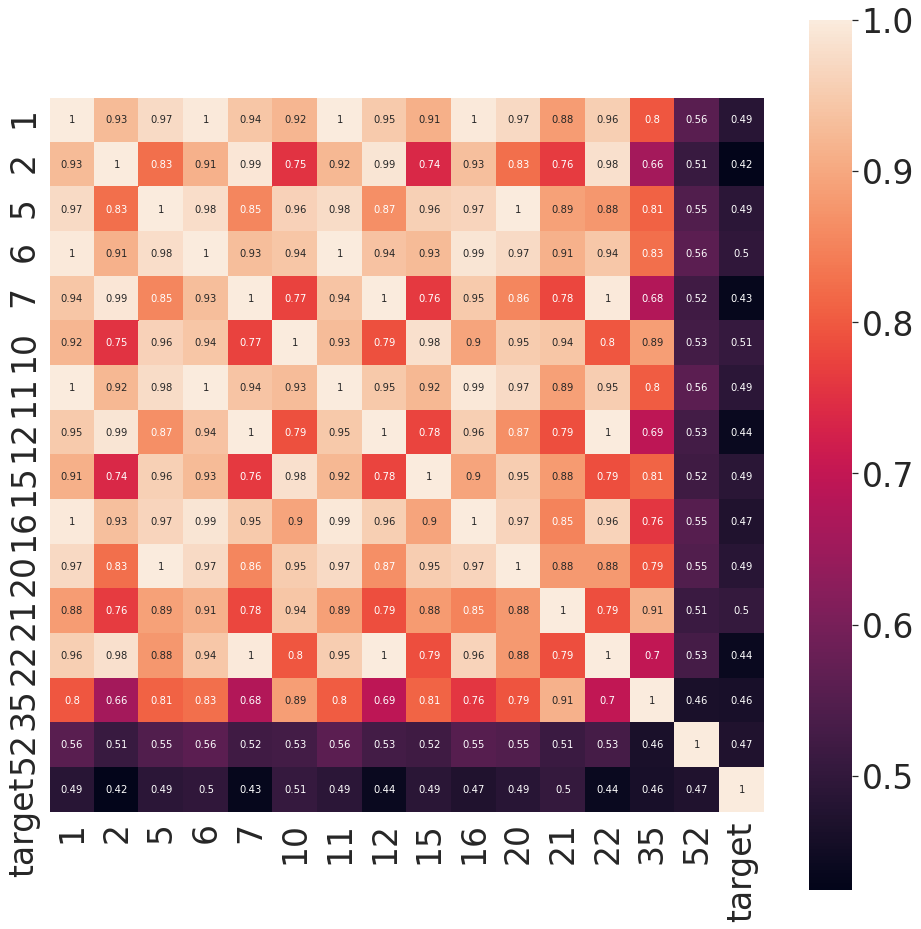

In [7]:
#Checking whether these attributes are correlated with each other or not
#To check correlation between attributes we can visualize it from heat map
#lighter ones => high correlation
#darker ones => lower correlation
fig=plt.subplots(figsize=(16,16))
sns.set(font_scale=3)
sns.heatmap(modified_dataset.corr(),square=True,cbar=True,annot=True,annot_kws={'size': 10})

In [8]:

#Trying to estimate time by considering only single highly correlated attribute. for eg radius mean
data=modified_dataset.to_numpy()
x=data[:,0].T
x=x.astype(float)
t=data[:,15].T
t=t.astype(float)

p=0.2
Xtr=x[0:int(p*len(x))]
Xtr=np.reshape(Xtr,(1,len(Xtr)))
Ytr=t[0:int(p*len(x))]

#linear regression (polynomial kernel)
M=20
err=np.array([])
for m in range(10,M+1,2):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr)
    #weight_vector=pinv(phi,t)
    y=weight_vector.T@phi
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2).flatten())/(len(y))))


    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value+10,"and its values is ",min_err)


Minimum error occurs for M = 10 and its values is  24.3465187625642


In [9]:
#Linear Regression

data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.01
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]

M=5
err=np.array([])
for m in range(M+1):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)

Minimum error occurs for M = 5 and its values is  11.195865689145185


2. Breast Cancer Wisconsin (Prognostic) Data Set

Predict the recurrence time/disease-free time of the breast cancer patients from
the first 30 features computed from a digitized image of a fine needle aspirate
(FNA) of a breast mass.

Link to dataset: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29

In [12]:
column_names = ['ID','Outcome','Time', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
       'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst', 'Tumor Size', 'Lymph Node Status']

In [13]:
raw_dataset=pd.read_csv('wpbc.csv',names=column_names,na_values="?",sep=",")
dataset = raw_dataset.copy()

In [14]:
dataset.head()


,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
0,ID number,Out,Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
2,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
3,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
4,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0


In [15]:
#Checking the presence of NA values and dropping them
dataset.isna().sum()

ID                         0
Outcome                    0
Time                       0
Radius Mean                1
Texture Mean               1
Perimeter Mean             1
Area Mean                  1
Smoothness Mean            1
Compactness Mean           1
Concavity Mean             1
Concave Points Mean        1
Symmetry Mean              1
Fractal Dimension Mean     1
Radius SE                  1
Texture SE                 1
Perimeter SE               1
Area SE                    1
Smoothness SE              1
Compactness SE             1
Concavity SE               1
Concave Points SE          1
Symmetry SE                1
Fractal Dimension SE       1
Radius Worst               1
Texture Worst              1
Perimeter Worst            1
Area Worst                 1
Smoothness Worst           1
Compactness Worst          1
Concavity Worst            1
Concave Points Worst       1
Symmetry Worst             1
Fractal Dimension Worst    1
Tumor Size                 1
Lymph Node Sta

In [16]:
dataset=dataset.dropna()

In [17]:
#Selecting the data rows in which disease has recurred
dataset=dataset[dataset['Outcome']=='R']

In [18]:
dataset.head()

,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
5,843584,R,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.19800,...,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
6,843786,R,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.16640,...,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
8,844582,R,77,13.71,20.83,90.20,577.9,0.1189,0.1645,0.09366,...,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
14,847990,R,36,14.54,27.54,96.73,658.8,0.1139,0.1595,0.16390,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
16,848620,R,10,16.13,20.68,108.10,798.8,0.1170,0.2022,0.17220,...,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1.0


In [19]:
#Dropping the columns ID and Outcome as they do not add any value to model
dataset = dataset.drop('Outcome', 1)
dataset = dataset.drop('ID', 1)

In [20]:
baseline_dataset = dataset
baseline_dataset = baseline_dataset.drop('Time', axis = 1)

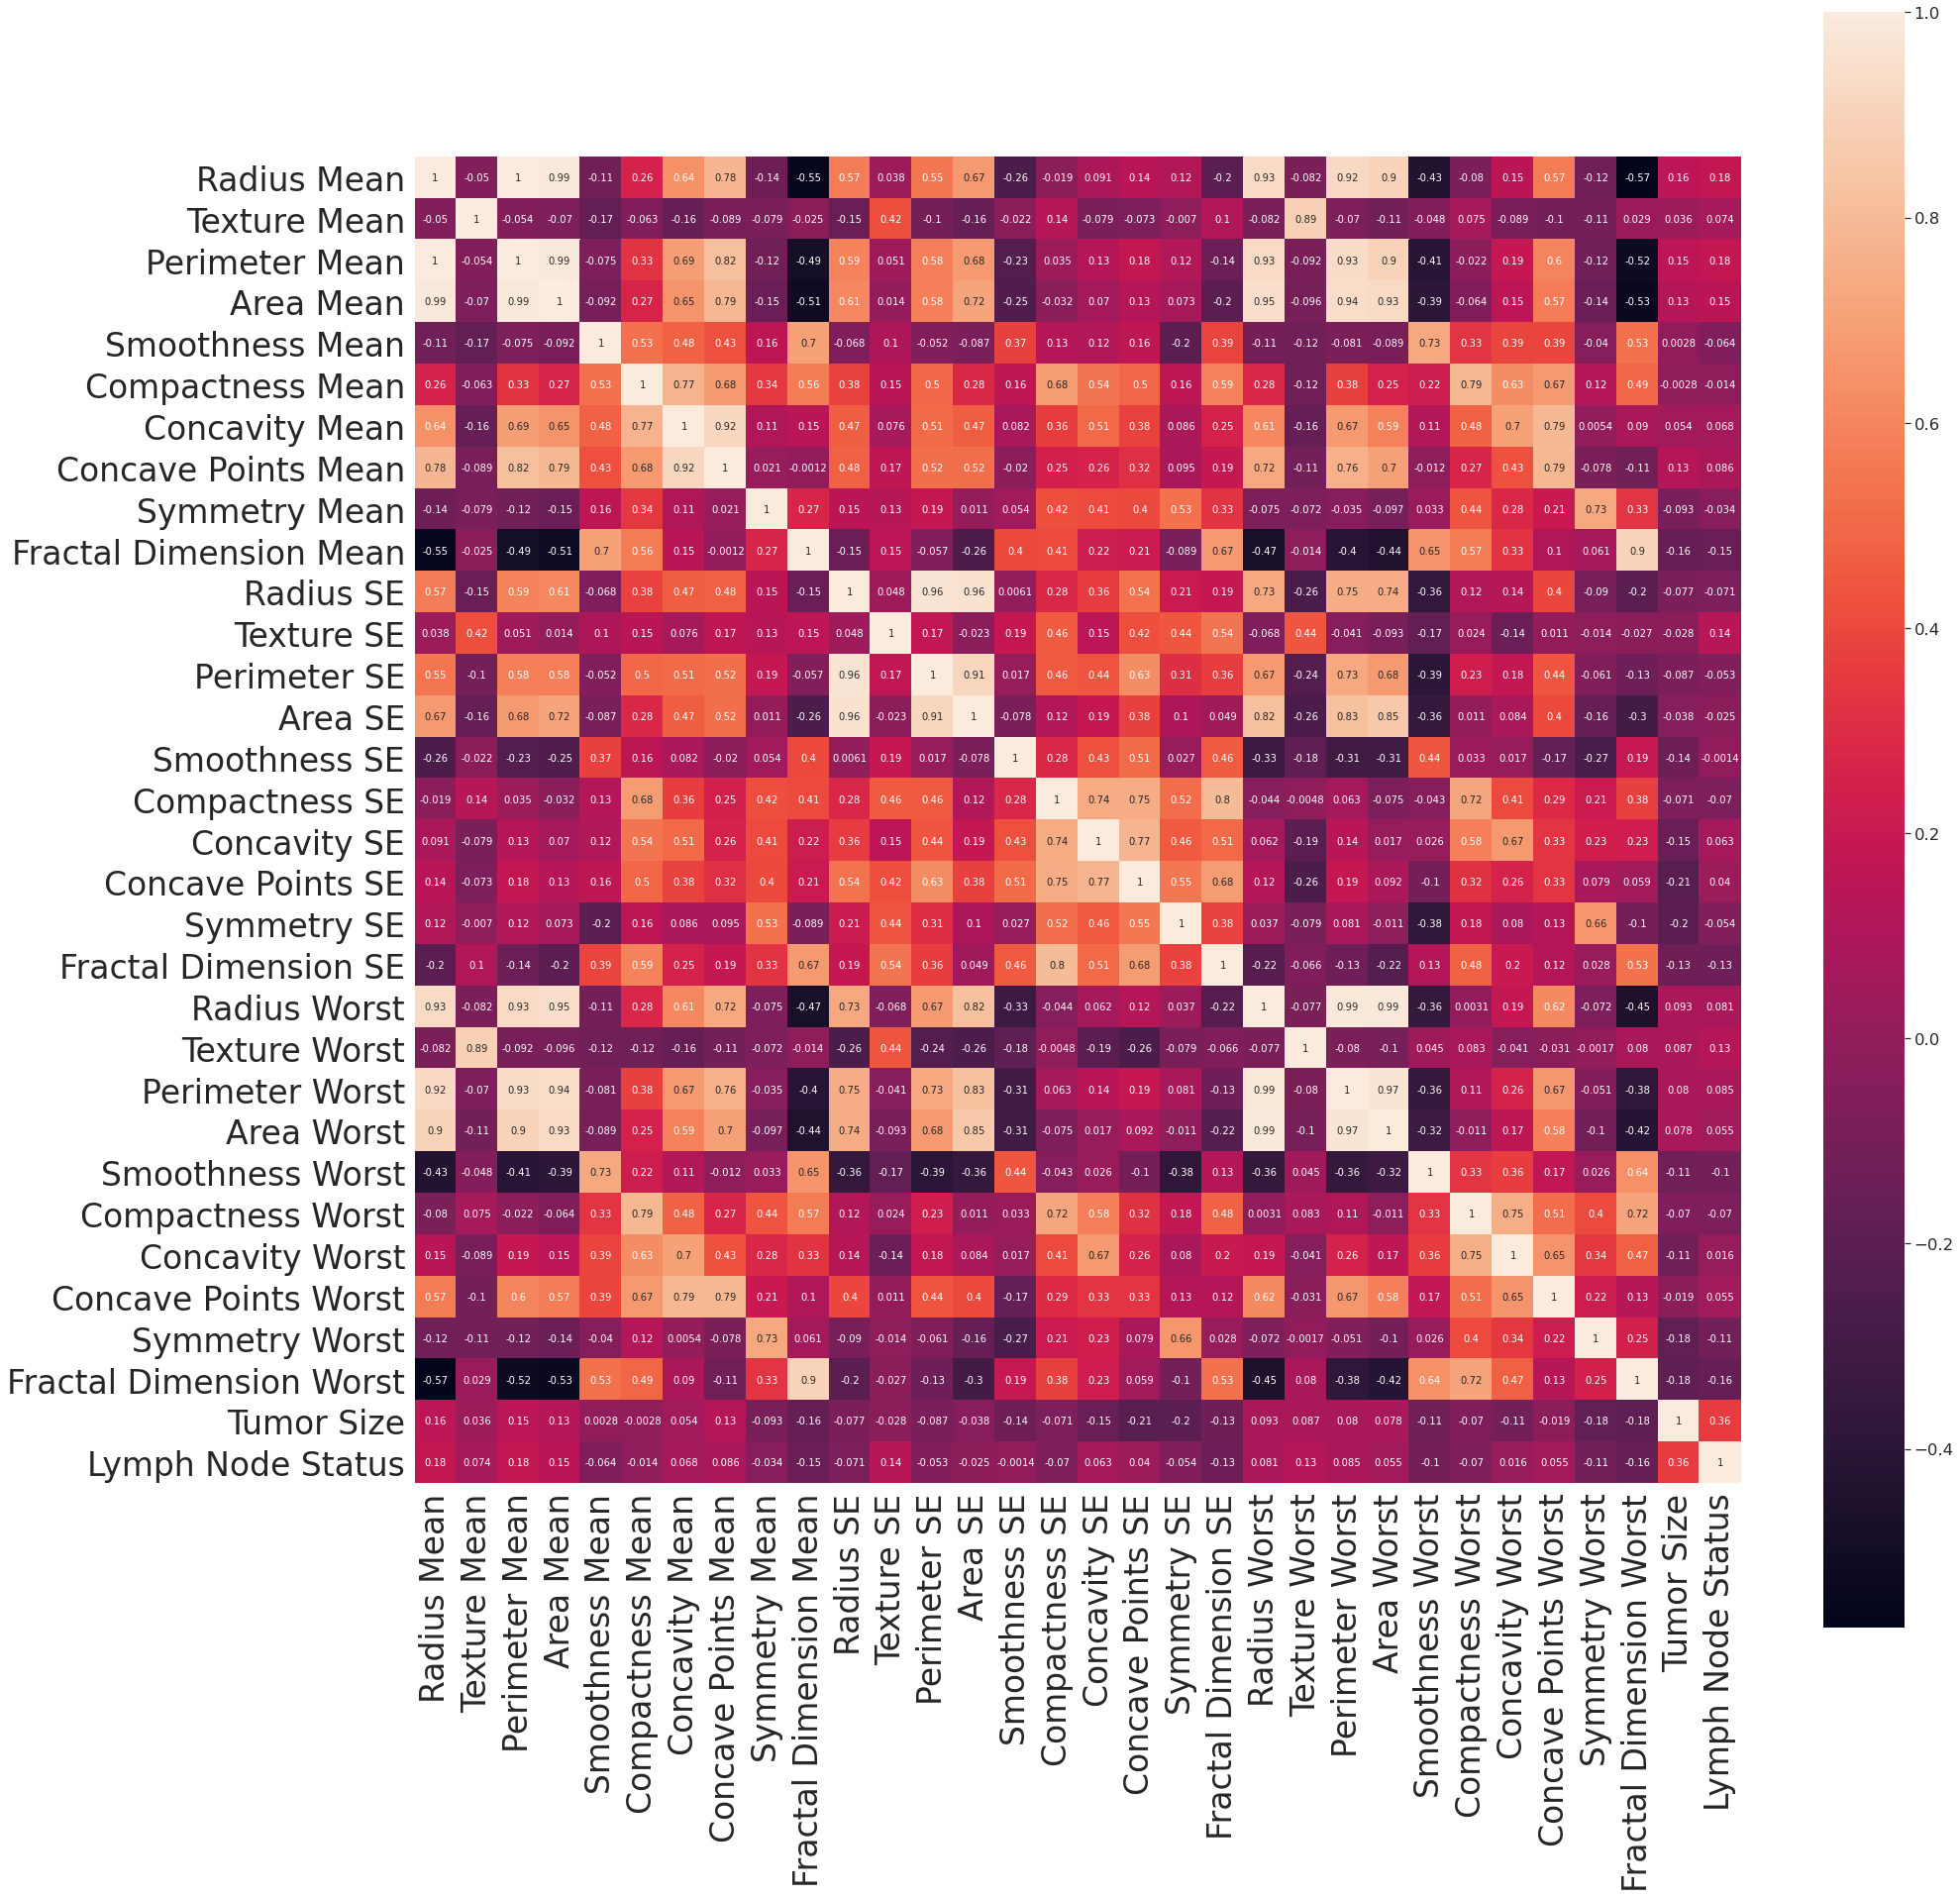

In [21]:

fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})


Minimum error occurs for M = 10 and its values is  130.64668378668068


<Figure size 432x288 with 0 Axes>

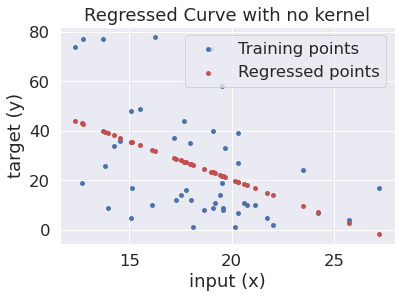

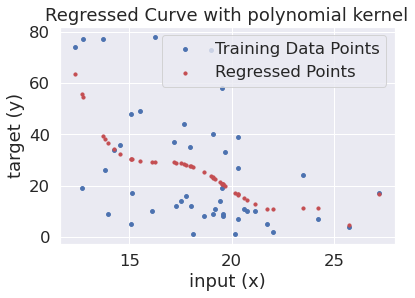

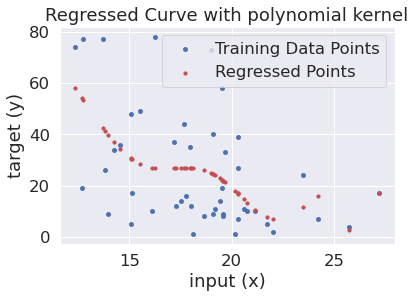

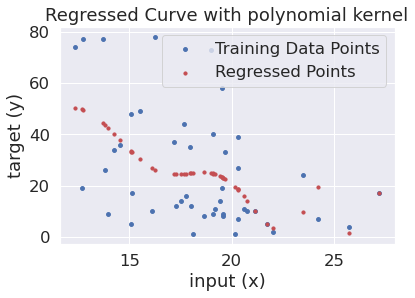

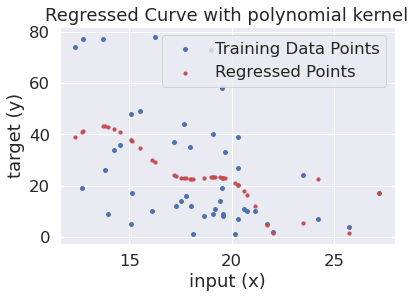

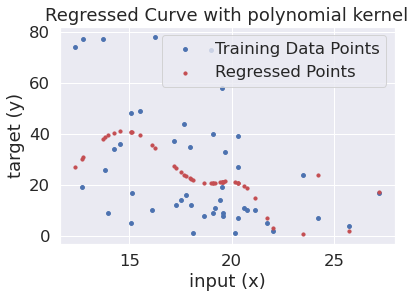

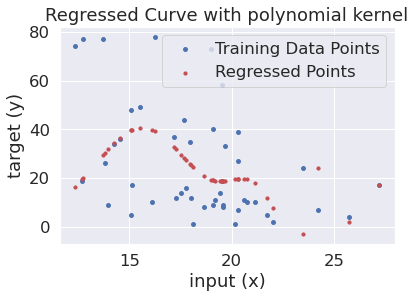

In [22]:
#Trying to estimate time by considering only single highly correlated attribute. for eg radius mean
single_attribute_dataset = dataset[['Radius Mean']]

x=single_attribute_dataset.to_numpy().T
t=dataset[['Time']].to_numpy().T
t=t.astype(np.float)

N=x.shape[1]
X=stack_onearray(x,N)
weight_vector=least_squares(X,t)
#weight_vector=pinv(X,t)

#linear regression (no kernel)
plt.figure()
y=weight_vector.T@X
plt.figure()
plt.scatter(x,t,15,label='Training points')
plt.scatter(x,y,15,c='r',label='Regressed points')
plt.xlabel("input (x)")
plt.ylabel("target (y)")
plt.legend()
plt.title("Regressed Curve with no kernel")

#linear regression (polynomial kernel)
M=20
err=np.array([])
for m in range(10,M+1,2):
    phi=poly_kernel(x,m)
    weight_vector=least_squares(phi,t)
    #weight_vector=pinv(phi,t)
    y=weight_vector.T@phi
    err=np.append(err,np.sqrt(sum(((y-t)**2).flatten())/(len(y))))


    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
    plt.figure()
    plt.scatter(x,t,15,label='Training Data Points')
    #plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    plt.scatter(x,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve with polynomial kernel")
    plt.grid(True)

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value+10,"and its values is ",min_err)

In [23]:
#Multiple Attributes
drop_list = ['Texture Mean', 'Perimeter Mean', 'Area Mean','Compactness Mean', 'Smoothness Mean', 'Concavity Mean', 'Symmetry Mean',
             'Radius SE','Perimeter SE', 'Area SE', 'Texture SE', 'Compactness SE', 'Smoothness SE', 'Concavity SE', 'Concave Points SE', 'Fractal Dimension SE', 'Symmetry SE',
             'Area Worst','Perimeter Worst','Compactness Worst', 'Concavity Worst', 'Fractal Dimension Worst', 'Symmetry Worst',
             'Concave Points Worst','Texture Worst','Lymph Node Status', 'Tumor Size']
multiple_attribute_dataset = dataset.drop(drop_list,axis = 1 )
multiple_attribute_dataset.head()

,Time,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
5,27,20.29,0.10430,0.05883,22.54,0.1374
6,77,12.75,0.07666,0.07164,15.51,0.1706
8,77,13.71,0.05985,0.07451,17.06,0.1654
14,36,14.54,0.07364,0.07077,17.46,0.1678
16,10,16.13,0.10280,0.07356,20.96,0.1789


In [24]:
#Case1: Dimension=2
drop_list=['Fractal Dimension Mean','Radius Worst','Smoothness Worst']
two_attribute_dataset=multiple_attribute_dataset.drop(drop_list,axis=1)
two_attribute_dataset.head()

,Time,Radius Mean,Concave Points Mean
5,27,20.29,0.10430
6,77,12.75,0.07666
8,77,13.71,0.05985
14,36,14.54,0.07364
16,10,16.13,0.10280


In [25]:
data=two_attribute_dataset.to_numpy()
x=data[:,1:].T
x=x.astype(float)
t=data[:,0].T
t=t.astype(float)

M=100
err=np.array([])
for m in range(M+1):
    phi=poly_kernel(x,m)
    weight_vector=least_squares(phi,t)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-t)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)

Minimum error occurs for M = 5 and its values is  19.093494155726596


In [26]:
#Case2: 30 features
data=dataset.to_numpy()
x=data[:,1:30].T
x=x.astype(float)
t=data[:,0].T
t=t.astype(float)

M=50
err=np.array([])
for m in range(M+1):
    phi=poly_kernel(x,m)
    weight_vector=least_squares(phi,t)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-t)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)

Minimum error occurs for M = 2 and its values is  1.0810180843106047e-06


3. Multiple Output Regression

Until now, we mainly concentrated on a single target variable from the input
vector. In this example, we use supply chain management data (scm1d) to
predict target vector from the input vector. A brief description of multioutput
regression can be found in Section 3.1.5 of Bishop’s book.

Link to dataset: https://www.google.com/url?sa=D&q=https://osdn.net/projects/sfnet_mulan/downloads/datasets/multi-target%2520regression%2520datasets/scm1d-train.zip/&ust=1614962760000000&usg=AOvVaw08vzJ-d1xPOiLdCeD6-j3R&hl=en

In [28]:
from scipy.io import arff # used only to load arff file 


In [29]:
data, meta = arff.loadarff('scm1d-train.arff')

Reading the data

In [30]:
X = np.array(data.tolist(), dtype=np.float32)
Y  = X[:,X.shape[1]-16:].T
input = X[:,:X.shape[1]-16]
X=X.T

Training the model 

In [33]:

P=[0.1,0.3,0.5,0.8,1]
for p in P: 
    Xtr=X[:,0:int(p*X.shape[1])]
    Ytr=Y[:,0:int(p*Y.shape[1])]
    Xte=X[:,int(p*X.shape[1]):]
    Yte=Y[:,int(p*Y.shape[1]):]
    Xte=Yte[:,:Xte.shape[1]-1]
    Yte=Yte[:,:Yte.shape[1]-1]

    phi=poly_kernel(Xtr,2)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    #Printting the size of multivariate target 
    print('Size of multivariate target', y.shape)
    
    err=sum(sum((y-Ytr)**2)/y.shape[1])
    print('Training error for data size =',int(p*X.shape[1]),'is ',err,'\n')

Size of multivariate target (16, 814)
Training error for data size = 814 is  6.3250931793980585e-18 

Size of multivariate target (16, 2443)
Training error for data size = 2443 is  3.394582059531814e-18 

Size of multivariate target (16, 4072)
Training error for data size = 4072 is  2.8532698261972174e-17 

Size of multivariate target (16, 6516)
Training error for data size = 6516 is  3.301810982369566e-18 

Size of multivariate target (16, 8145)
Training error for data size = 8145 is  4.9011278443845834e-18 

